In [1]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import matplotlib.cbook as cbook
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os import listdir
from os.path import isfile, join

In [2]:
class DataSet:
    def __init__(self, size, vThresh, vHold):
        self.size = size
        self.vThresh = vThresh
        self.vHold = vHold
        self.cycles = list(range(1,len(vThresh) + 1))

In [3]:
filePath = r"C:\Users\Ted Mburu\NbO2\SelectorIV\CompleteData_negative.csv"
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data = df5.values
df5.head()

negativeVoltages = []
negativeSizes = data[1][0].split(",")

for x in range(1, len(negativeSizes)):
    negativeSizes[x] = negativeSizes[x][:-2]
    negativeSizes[x] = negativeSizes[x] + "x" + negativeSizes[x] + r" nm$^2$"
    
uniqueNegSizes = []
for x in range(len(negativeSizes)):
    uniqueNegSizes.append(negativeSizes[x])
uniqueNegSizes = pd.unique(uniqueNegSizes)[1:]

sizes = [negativeSizes[3], negativeSizes[11], negativeSizes[19], negativeSizes[27], negativeSizes[35]]
vThreshColumns = [3, 11, 19, 27, 35]
vHoldColumns = [7, 15, 23, 31, 39]

for x in range(len(sizes)):
    vThresh = []
    vHold = []
    for y in range(2, 1002):
        rowData = data[y][0].split(",")
        vThresh.append(rowData[vThreshColumns[x]])
        vHold.append(rowData[vHoldColumns[x]])
    negativeVoltages.append(DataSet(sizes[x], np.array(vThresh), np.array(vHold)))

In [4]:
filePath = r"C:\Users\Ted Mburu\NbO2\SelectorIV\CompleteData_positive.csv"
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data = df5.values
df5.head()

positiveVoltages = []
positiveSizes = data[1][0].split(",")

for x in range(len(sizes)):
    vThresh = []
    vHold = []
    for y in range(2, 1002):
        rowData = data[y][0].split(",")
        vThresh.append(rowData[vThreshColumns[x]])
        vHold.append(rowData[vHoldColumns[x]])
    positiveVoltages.append(DataSet(sizes[x], np.array(vThresh), np.array(vHold)))

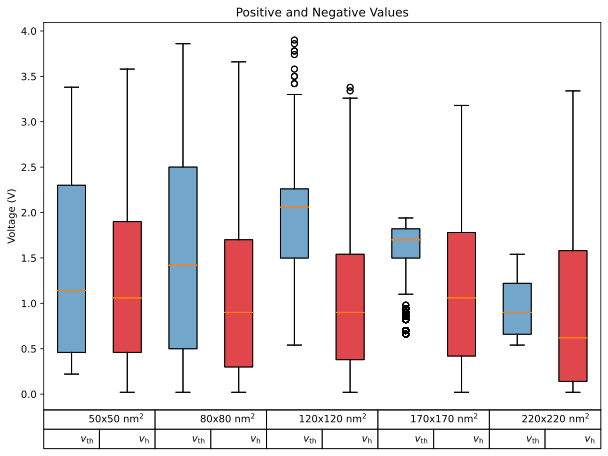

In [5]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
dataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            dataToPlot.append(np.concatenate((negVThresh, posVThresh)))
            dataToPlot.append(np.concatenate((negVHold, posVHold)))
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(dataToPlot[x])
    
    
plt.boxplot(dataToPlot)

title = "Positive and Negative Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])
holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

# nValues = []
# for x in range(len(negativeVoltages)):
#     nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
# mValues = []
# for x in range(len(negativeVoltages)):
#     mValues.append("m = 100")

# cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

# cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

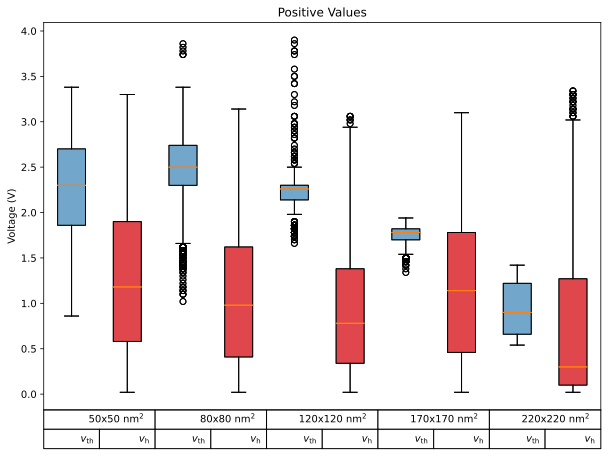

In [6]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
dataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            dataToPlot.append(posVThresh)
            dataToPlot.append(posVHold)
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(dataToPlot[x])
    
    
plt.boxplot(dataToPlot)

title = "Positive Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])
holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

# nValues = []
# for x in range(len(negativeVoltages)):
#     nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
# mValues = []
# for x in range(len(negativeVoltages)):
#     mValues.append("m = 100")

# cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

# cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

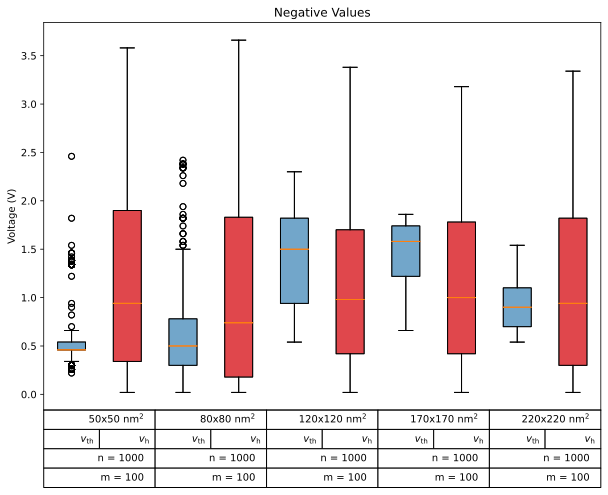

In [7]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
dataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            dataToPlot.append(negVThresh)
            dataToPlot.append(negVHold)
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(dataToPlot[x])
    
    
plt.boxplot(dataToPlot)

title = "Negative Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])

holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

nValues = []
for x in range(len(negativeVoltages)):
    nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
mValues = []
for x in range(len(negativeVoltages)):
    mValues.append("m = 100")

cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

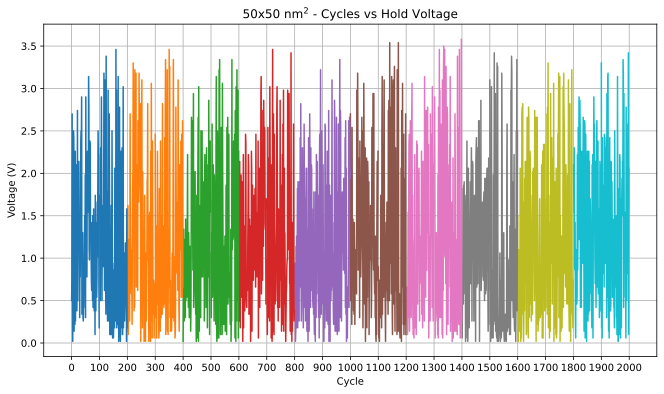

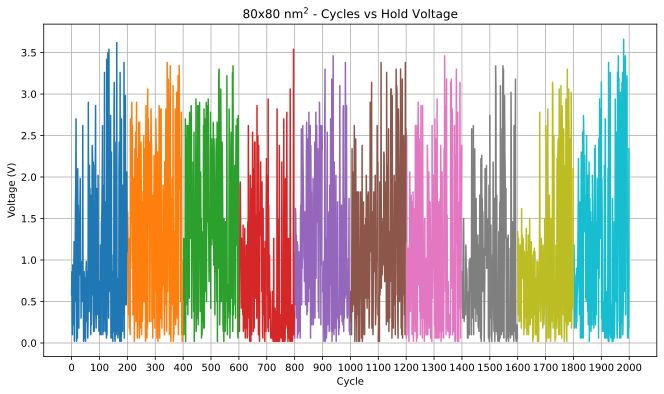

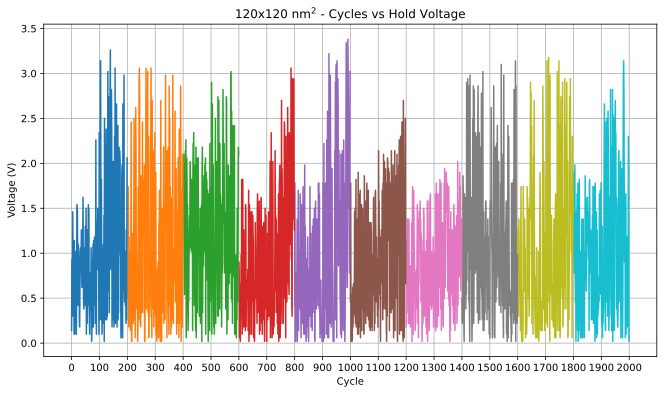

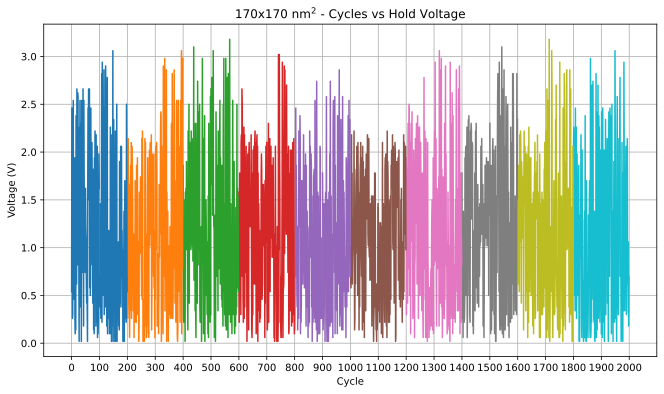

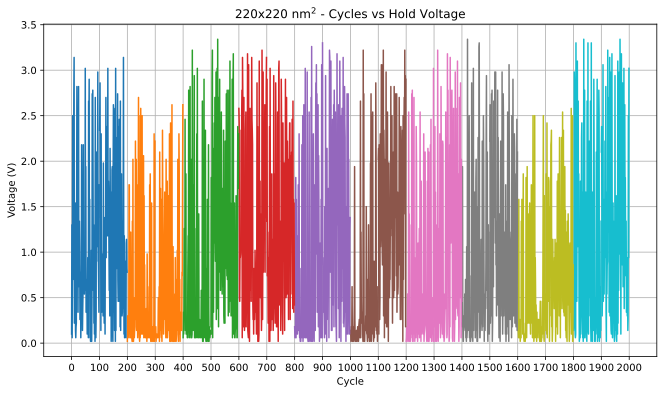

In [8]:
for x in range(len(positiveVoltages)):
    plt.rcParams['figure.figsize'] = (11,6)
    plt.figure(x)
    plt.grid()
#     plt.plot(positiveVoltages[x].cycles, positiveVoltages[x].vThresh)
#     plt.plot(negativeVoltages[x].cycles, negativeVoltages[x].vThresh)
    
    cyclesOne = [y for y in positiveVoltages[x].cycles]
    for a in range(10):
        cyclesOne[a * 100:(a * 100) + 100] = [k for k in range(a * 200,(a * 200) + 100)]
        movedData = np.array([float(ele) for ele in positiveVoltages[x].vHold])
        plt.plot(cyclesOne[a * 100:(a * 100) + 100],  movedData[a * 100:(a * 100) + 100])
    
    
    neg = [float(ele) for ele in negativeVoltages[x].vHold]
    cyclesTwo = [y for y in negativeVoltages[x].cycles]
    cyclesTwo = np.array(cyclesTwo)
    for a in range(10):
        cyclesTwo[a * 100:(a * 100) + 100] = [k for k in range((a * 200) + 100,(a * 200) + 200)]
        movedData = np.array([abs(ele) for ele in neg])
        plt.plot(cyclesTwo[a * 100:(a * 100) + 100],  movedData[a * 100:(a * 100) + 100])
        plt.xlabel('Cycle');
        plt.ylabel('Voltage (V)');
    plt.xticks(np.arange(0, 2001, 100))
    title = uniqueNegSizes[x] + " - Cycles vs Hold Voltage"
    plt.title(title);
    plt.savefig(title + r'.pdf', bbox_inches = 'tight')

In [9]:
mypath = r"C:\Users\Ted Mburu\NbO2\SelectorIV"

voltageToAnalyse = 0.4

class DataAtVoltage:
    def __init__(self, filePath):
        self.filePath = filePath
        self.getSize()
        self.getCurrents()
        self.getResistances()
        self.getData()
    
    def getSize(self):
        size = self.filePath.split("NbO2_")[1].split("_Dev")[0][:-2]
        size = size + r"x" + size + r" nm$^2$"
        self.size = size
        
    def getCurrents(self):      
        df5 = pd.read_csv(self.filePath, names=['Voltage (V)', 'Current (A)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        allData = [float(data[63][0].split(",")[2]), float(data[244][0].split(",")[2])]
        self.currents = allData
        
    def getData(self):      
        df5 = pd.read_csv(self.filePath, names=['Voltage (V)', 'Current (A)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        allData = data[:,0][54:]
        I= [ele.split(",")[2] for ele in allData]
        V= [ele.split(",")[1] for ele in allData]
        
        self.I= [float(ele) for ele in I]
        self.V= [float(ele) for ele in V]
        
    def getResistances(self): 
        self.resitances = [voltageToAnalyse/self.currents[0], voltageToAnalyse/self.currents[1]]

In [10]:
allFiles = []
for fileName in listdir(mypath):
    fullPath = join(mypath, fileName)
    if isfile(fullPath) and "Selector-IV-sweep" in fileName:
        allFiles.append(DataAtVoltage(fullPath))

# allFiles[0] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_12-28-00-453073_NbO2_50nm_DevX2Y1_DieX0Y0_1.csv")

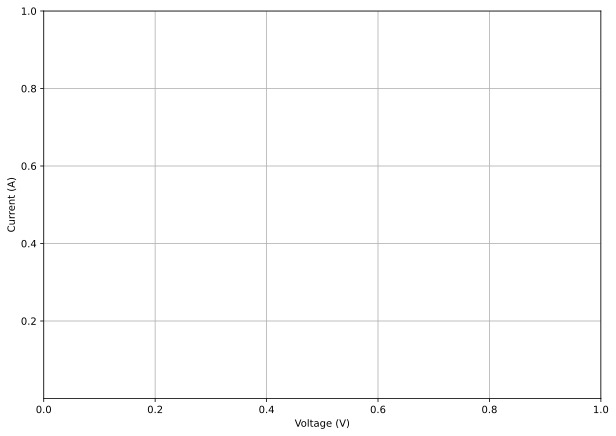

In [11]:
allFiles[0].getData()

plt.rcParams['figure.figsize'] = (11,6)
#plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
fig, ax = plt.subplots(figsize =(10, 7))
plt.grid()

vToPlot = []
iToPlot = []
for x in range(len(allFiles)):
    if allFiles[x].size == "120x120":
#         vToPlot.append(allFiles[x].V)
#         iToPlot.append(allFiles[x].I)
        plt.semilogy(allFiles[x].V, allFiles[x].I)
        maxI = max(allFiles[x].I)
        if maxI > 1000:
            print([index for index, item in enumerate(allFiles[x].I) if item == maxI])
#             print(x, allFiles[x].filePath)
ax.set_ylim([1e-9, 1])
# plt.semilogy(vToPlot[0], iToPlot[0])


plt.xlabel('Voltage (V)');
plt.ylabel('Current (A)');

In [12]:
# allFiles[0].getData()

# plt.rcParams['figure.figsize'] = (11,6)
# #plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
# plt.figure(123)
# plt.grid()

# vToPlot = []
# iToPlot = []
# for x in range(len(allFiles)):
#     if allFiles[x].size == "120x120":
#         vToPlot.append(allFiles[x].V)
#         iToPlot.append(allFiles[x].I)
        
# #         voltagesToPlot = []
# #         currentsToPlot = []
        
# #         for x in range(len(vToPlot)):
# #             print(iToPlot[x])
# #             if iToPlot[x] < 100:
# #                 voltagesToPlot.append(vToPlot[x])
# #                 currentsToPlot.append(iToPlot[x])
        
        
#         plt.semilogy(allFiles[x].V, allFiles[x].I)
# #         plt.semilogy(voltagesToPlot, currentsToPlot)
        
#         maxI = max(allFiles[x].I)
#         if maxI > 1000:
#             print([index for index, item in enumerate(allFiles[x].I) if item == maxI])
#             print(x, allFiles[x].filePath)

# # plt.semilogy(vToPlot[0], iToPlot[0])
# # print(len(vToPlot))
# plt.semilogy(vToPlot, iToPlot)

# plt.xlabel('Voltage (V)');
# plt.ylabel('Current (A)');

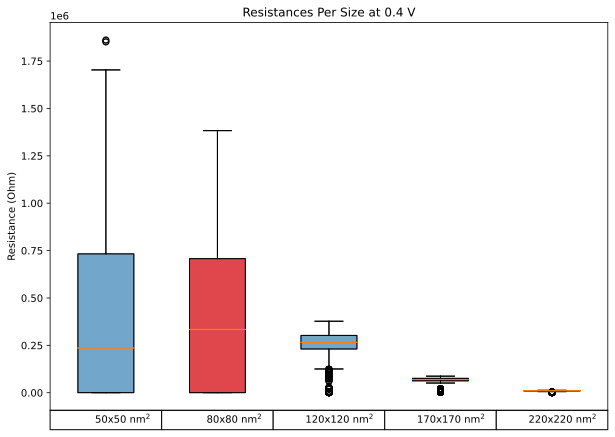

In [13]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# # Creating plot
dataToPlot = []

for size in uniqueNegSizes:
    currentForSize = []
    for x in range(len(allFiles)):
        if allFiles[x].size == size:
            currentForSize.append(np.absolute(allFiles[x].resitances[0]))
            currentForSize.append(np.absolute(allFiles[x].resitances[1]))

            
    dataToPlot.append(currentForSize)
    
plt.boxplot(dataToPlot)

# print(np.mean(dataToPlot[0]))
# print(np.mean(dataToPlot[1]))
# print(np.mean(dataToPlot[2]))
# print(np.mean(dataToPlot[3]))
# print(np.mean(dataToPlot[4]))

title = "Resistances Per Size at " + str(voltageToAnalyse) + " V"
ax.set_title(title)
ax.set_ylabel('Resistance (Ohm)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 